In [2]:
%matplotlib inline

import sys
sys.path.insert(0, '../')

from pharynx_analysis import experiment
from pharynx_analysis import pharynx_io as pio
from pharynx_analysis import image_processing
from pharynx_analysis import utils
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mpl_col
import numpy as np
import xarray as xr
from skimage import measure, transform
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd
import pickle
from importlib import reload
import json

In [3]:
# pe = pickle.load(open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'rb'))
# pe.raw_image_data.strain.size
reload(experiment)
img_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/2017_02_22-HD233_SAY47.tif"
strain_map_path = "/Users/sean/code/wormAnalysis/data/paired_ratio_movement_data_sean/2017_02_22-HD233_SAY47/indexer.csv"

strains = pio.load_strain_map_from_disk(strain_map_path)
# pe = experiment.PairExperiment(img_path, "TL/470_1/410_1/470_2/410_2", strains, midline_smoothing=1e8)

imgs = pio.load_images(img_path, "TL/470/410/470/410", strains)

# pickle.dump(pe, open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'wb'))

In [6]:
imgs.shape

(123, 3, 2, 130, 174)

In [24]:
raw_intensity_data = xr.DataArray(
    np.zeros(
        (fl_stack.strain.size, fl_stack.wavelength.size, fl_stack.pair.size, 100)
    ),
    dims=['strain', 'wavelength', 'pair', 'position'],
    coords={'strain': fl_stack.strain, 'wavelength': fl_stack.wavelength, 'pair': fl_stack.pair}
)
raw_intensity_data.shape

(123, 3, 2, 100)

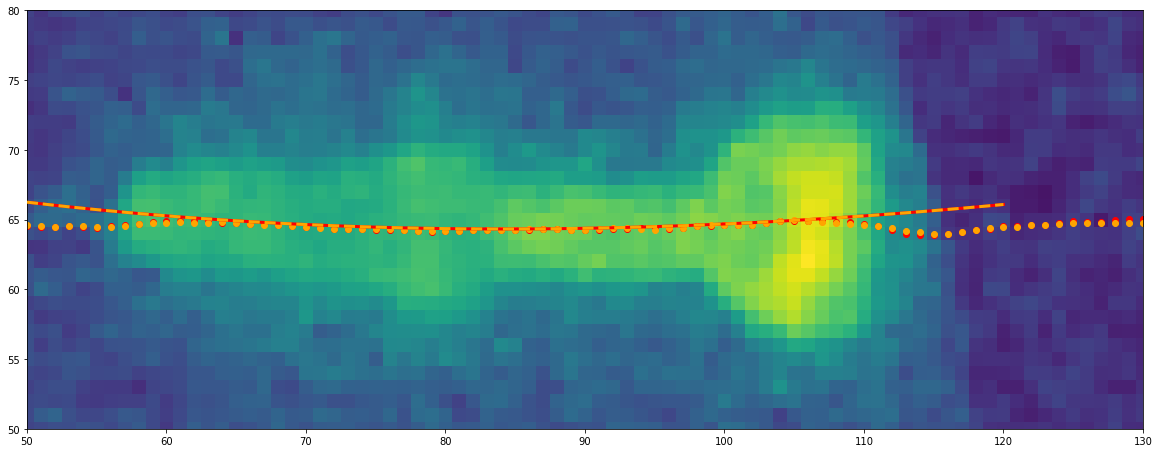

In [14]:
j=3

I410 = pe.rot_fl.sel(wavelength='410_1')[j]
I470 = pe.rot_fl.sel(wavelength='470_1')[j]

ys = np.arange(I410.shape[0])

locs410 = []
locs470 = []
for i in range(I410.shape[1]):
    locs410.append(np.average(ys, weights=I410[:,i].data))
    locs470.append(np.average(ys, weights=I470[:,i].data))
    

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.imshow(I410/I470);
ax.scatter(x=np.arange(len(locs410)), y=locs410, color='red');
ax.scatter(x=np.arange(len(locs410)), y=locs470, color='orange');
ax.set_ylim((50,80))
ax.set_xlim((50,130))
xs = np.linspace(50,120)
ax.plot(xs, pe.midlines['410_1'][j](xs), color='red', zorder=2, linewidth=3, linestyle='-');
ax.plot(xs, pe.midlines['470_1'][j](xs), color='orange', zorder=3, linewidth=3, linestyle='--');

In [28]:
def figure_to_np_array(fig):
    fig.tight_layout(pad=0)
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data

In [302]:
figure_to_np_array(fig).shape

(360, 720, 3)

In [ ]:
imgs